In [1]:
import os
import itertools
import numpy as np
import operator
import math
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [2]:
def grouper(n, iterable, fillvalue=None):
    args = [iter(iterable)] * n
    return itertools.zip_longest(*args, fillvalue=fillvalue)

In [3]:
doctopic_triples = []
mallet_docnames = []

In [4]:
#here you can put the strings you want to get rid off when showing the titles
list_authors_to_replace=['Zola-Emile','Dumas-Alexandre-Pere','Dumas-Alexandre','Balzac-Honore-de','Verne-Jules','Sand-George','Flaubert-Gustave']
list_authors_to_find=['Zola-Emile','Balzac-Honore-de']

In [5]:
def replace_all(text, dic):
    for i in dic:
        text = text.replace(i, "")
    return text

In [6]:
with open("test_dumas_etc-llda-doc-topics.txt") as f:
    f.readline()  # read one line in order to skip the header
    for line in f:
        docnum, docname, *values = line.rstrip().split('\t')
        if docname.split('_')[1] in list_authors_to_replace:
            #docname=replace_all(docname, list_authors_to_replace)
            mallet_docnames.append(docname[5:-4])
            print(docname[5:-4])
            index_topic=0
            for share in grouper(1, values):
                triple = (docname[5:-4], index_topic, float(share[0]))
                doctopic_triples.append(triple)
                index_topic+=1

Zola-Emile_La-curee
Balzac-Honore-de_Les-Parents-pauvres-La-Cousine-BetteFC
Zola-Emile_Pot-Bouille
Dumas-Alexandre_Le-Comte-de-Monte-Cristo
Balzac-Honore-de_Illusions-perdues
Zola-Emile_Germinal
Zola-Emile_L-assomoir
Zola-Emile_La-faute-de-l-abbe-Mouret
Zola-Emile_Nana
Dumas-Alexandre_La-Tulipe-noire
Dumas-Alexandre_La-San-Felice
Dumas-Alexandre_Les-Trois-Mousquetaires
Balzac-Honore-de_Une-tenebreuse-affaire
Dumas-Alexandre-Pere_La-fille-du-marquis-II
Dumas-Alexandre_La-dame-aux-camelias
Zola-Emile_Une-page-d-amour
Dumas-Alexandre-Pere_La-femme-au-collier-de-velours
Dumas-Alexandre-Pere_Black
Dumas-Alexandre_Les-Blancs-et-les-Bleus
Dumas-Alexandre-Pere_Jane
Zola-Emile_La-fortune-des-Rougon
Zola-Emile_Au-bonheur-des-dames
Dumas-Alexandre_Les-Louves-de-Machecoul
Dumas-Alexandre_La-comtesse-de-Charny
Balzac-Honore-de_Splendeurs-et-miseres-des-courtisanesFC
Dumas-Alexandre-Pere_Le-docteur-mysterieux-II
Balzac-Honore-de_Les-Parents-pauvres-Le-Cousin-PonsFC
Dumas-Alexandre_Vingt-ans-apres
Ba

In [7]:
print(doctopic_triples)

[('Zola-Emile_La-curee', 0, 4.605323754259925e-06), ('Zola-Emile_La-curee', 1, 0.3689831445150594), ('Zola-Emile_La-curee', 2, 4.605323754259925e-06), ('Zola-Emile_La-curee', 3, 4.605323754259925e-06), ('Zola-Emile_La-curee', 4, 0.03583402413189647), ('Zola-Emile_La-curee', 5, 0.1811319885787971), ('Zola-Emile_La-curee', 6, 0.4140232108317215), ('Zola-Emile_La-curee', 7, 4.605323754259925e-06), ('Zola-Emile_La-curee', 8, 4.605323754259925e-06), ('Zola-Emile_La-curee', 9, 4.605323754259925e-06), ('Balzac-Honore-de_Les-Parents-pauvres-La-Cousine-BetteFC', 0, 3.610238636773891e-06), ('Balzac-Honore-de_Les-Parents-pauvres-La-Cousine-BetteFC', 1, 0.420054875627279), ('Balzac-Honore-de_Les-Parents-pauvres-La-Cousine-BetteFC', 2, 3.610238636773891e-06), ('Balzac-Honore-de_Les-Parents-pauvres-La-Cousine-BetteFC', 3, 3.610238636773891e-06), ('Balzac-Honore-de_Les-Parents-pauvres-La-Cousine-BetteFC', 4, 0.010689916603487492), ('Balzac-Honore-de_Les-Parents-pauvres-La-Cousine-BetteFC', 5, 0.00765

In [8]:
mallet_docnames = sorted(mallet_docnames)

In [9]:
num_docs = len(mallet_docnames)

In [10]:
doctopic_triples = sorted(doctopic_triples, key=operator.itemgetter(0,1))

In [11]:
num_topics = len(doctopic_triples) // len(mallet_docnames)
print(len(doctopic_triples))
print(num_topics)

320
10


In [12]:
doctopic = np.zeros((num_docs, num_topics))

In [13]:
for triple in doctopic_triples:
    docname, topic, share = triple
    row_num = mallet_docnames.index(docname)
    doctopic[row_num, topic] = share

In [14]:
novel_names = []

In [15]:
for fn in mallet_docnames:
    basename = os.path.basename(fn)
    name, ext = os.path.splitext(basename)
    name = name.rstrip('0123456789')
    novel_names.append(name)
print(len(novel_names))

32


In [16]:
novel_names = np.asarray(novel_names)

In [17]:
doctopic

array([[  2.53613999e-06,   4.47631245e-01,   2.53613999e-06,
          2.53613999e-06,   1.24296221e-02,   6.41897033e-03,
          4.74790768e-02,   2.40197819e-02,   7.26122242e-02,
          3.89401471e-01],
       [  3.61023864e-06,   4.20054876e-01,   3.61023864e-06,
          3.61023864e-06,   1.06899166e-02,   7.65731615e-03,
          9.08011120e-02,   1.23867288e-02,   3.70883425e-01,
          8.75157948e-02],
       [  4.86168506e-06,   4.24818902e-01,   4.86168506e-06,
          4.86168506e-06,   1.84792649e-02,   1.90091886e-03,
          8.10005348e-02,   1.06519520e-02,   1.15567116e-01,
          3.47566727e-01],
       [  2.85379983e-06,   4.82694558e-01,   2.85379983e-06,
          2.85379983e-06,   9.24916526e-03,   4.34062955e-03,
          3.76444736e-02,   5.40252847e-02,   3.44741874e-01,
          6.72954539e-02],
       [  7.06214689e-06,   4.77478814e-01,   7.06214689e-06,
          7.06214689e-06,   7.06214689e-06,   2.05508475e-03,
          7.06214689e-06

In [18]:
doctopic_orig = doctopic.copy()

In [19]:
num_groups = len(set(novel_names))
print(num_groups)

32


In [20]:
doctopic_grouped = np.zeros((num_groups, num_topics))

In [21]:
for i, name in enumerate(sorted(set(novel_names))):
    doctopic_grouped[i, :] = np.mean(doctopic[novel_names == name, :], axis=0)

In [22]:
doctopic = doctopic_grouped

In [23]:
doctopic

array([[  2.53613999e-06,   4.47631245e-01,   2.53613999e-06,
          2.53613999e-06,   1.24296221e-02,   6.41897033e-03,
          4.74790768e-02,   2.40197819e-02,   7.26122242e-02,
          3.89401471e-01],
       [  3.61023864e-06,   4.20054876e-01,   3.61023864e-06,
          3.61023864e-06,   1.06899166e-02,   7.65731615e-03,
          9.08011120e-02,   1.23867288e-02,   3.70883425e-01,
          8.75157948e-02],
       [  4.86168506e-06,   4.24818902e-01,   4.86168506e-06,
          4.86168506e-06,   1.84792649e-02,   1.90091886e-03,
          8.10005348e-02,   1.06519520e-02,   1.15567116e-01,
          3.47566727e-01],
       [  2.85379983e-06,   4.82694558e-01,   2.85379983e-06,
          2.85379983e-06,   9.24916526e-03,   4.34062955e-03,
          3.76444736e-02,   5.40252847e-02,   3.44741874e-01,
          6.72954539e-02],
       [  7.06214689e-06,   4.77478814e-01,   7.06214689e-06,
          7.06214689e-06,   7.06214689e-06,   2.05508475e-03,
          7.06214689e-06

In [24]:
N, K = doctopic.shape
print(K)

10


In [25]:
ind = np.arange(N)

In [26]:
width = 0.5

In [27]:
plt.rcParams["figure.figsize"] = [16,9]

In [28]:
plt.bar(ind, doctopic[:,0], width=width)

<Container object of 32 artists>

In [29]:
plt.xticks(rotation=90)
plt.xticks(ind + width/2, novel_names)

([<matplotlib.axis.XTick at 0x7fda3cfaf1d0>,
 <a list of 32 Text xticklabel objects>)

In [30]:
plt.title('Share of Topic #0')

Text(0.5,1,'Share of Topic #0')

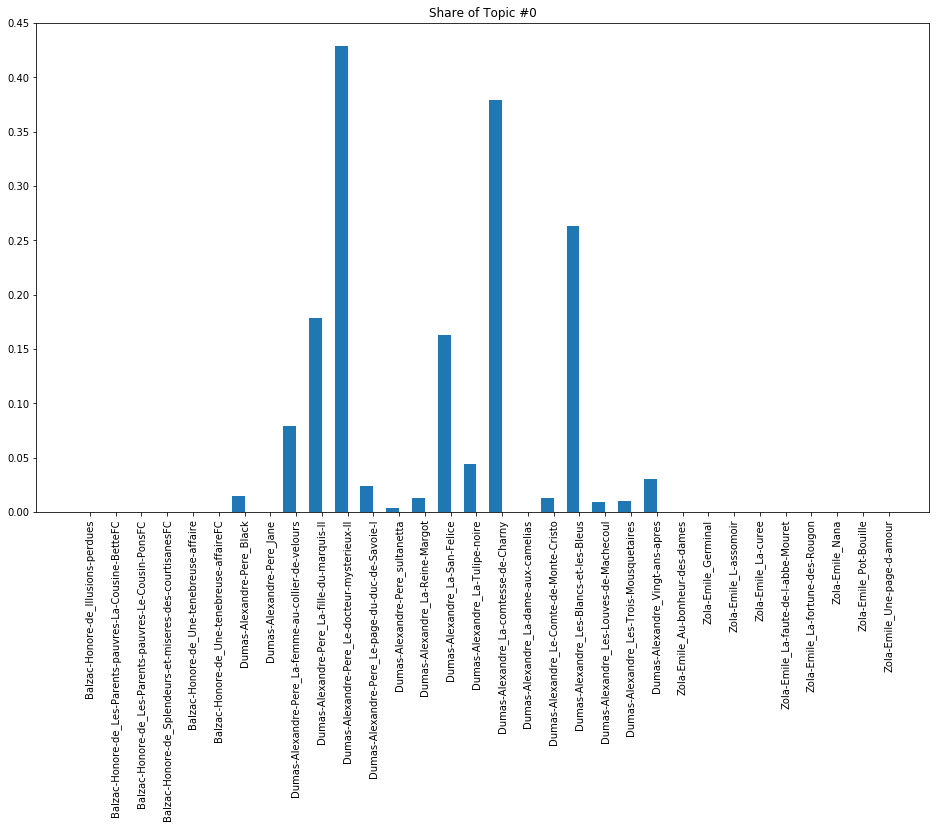

In [31]:
plt.show()

In [32]:
plots = []

In [33]:
height_cumulative = np.zeros(N)

In [34]:
for k in range(K):
    color = plt.cm.tab20(k/K, 1)
    if k == 0:
        p = plt.bar(ind, doctopic[:, k], width, color=color)
    else:
        p = plt.bar(ind, doctopic[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += doctopic[:, k]
    plots.append(p)

In [35]:
plt.ylim((0, 1))

(0, 1)

In [36]:
plt.ylabel('Topics')

Text(0,0.5,'Topics')

In [37]:
plt.title('Topics in novels')

Text(0.5,1,'Topics in novels')

In [38]:
plt.xticks(rotation=90)
plt.xticks(ind+width/2, novel_names)
index=1
for name in novel_names:
    print('numero '+str(index))
    print(name)
    index+=1

numero 1
Balzac-Honore-de_Illusions-perdues
numero 2
Balzac-Honore-de_Les-Parents-pauvres-La-Cousine-BetteFC
numero 3
Balzac-Honore-de_Les-Parents-pauvres-Le-Cousin-PonsFC
numero 4
Balzac-Honore-de_Splendeurs-et-miseres-des-courtisanesFC
numero 5
Balzac-Honore-de_Une-tenebreuse-affaire
numero 6
Balzac-Honore-de_Une-tenebreuse-affaireFC
numero 7
Dumas-Alexandre-Pere_Black
numero 8
Dumas-Alexandre-Pere_Jane
numero 9
Dumas-Alexandre-Pere_La-femme-au-collier-de-velours
numero 10
Dumas-Alexandre-Pere_La-fille-du-marquis-II
numero 11
Dumas-Alexandre-Pere_Le-docteur-mysterieux-II
numero 12
Dumas-Alexandre-Pere_Le-page-du-duc-de-Savoie-I
numero 13
Dumas-Alexandre-Pere_sultanetta
numero 14
Dumas-Alexandre_La-Reine-Margot
numero 15
Dumas-Alexandre_La-San-Felice
numero 16
Dumas-Alexandre_La-Tulipe-noire
numero 17
Dumas-Alexandre_La-comtesse-de-Charny
numero 18
Dumas-Alexandre_La-dame-aux-camelias
numero 19
Dumas-Alexandre_Le-Comte-de-Monte-Cristo
numero 20
Dumas-Alexandre_Les-Blancs-et-les-Bleus


In [39]:
plt.yticks(np.arange(0, 1, 10))

([<matplotlib.axis.YTick at 0x7fda3aedb550>],
 <a list of 1 Text yticklabel objects>)

In [40]:
list_topics =['aventure', 'mort', 'amitié', 'amour', 'argent', 'nature', 'ville', 'ambition', 'art', 'famille']

In [41]:
#Pour cette expérience, topic 0 : aventure ; topic 1 : argent ; topic 2 : mort
topic_labels = [k for k in list_topics]

In [42]:
plt.legend([p[0] for p in plots], topic_labels)

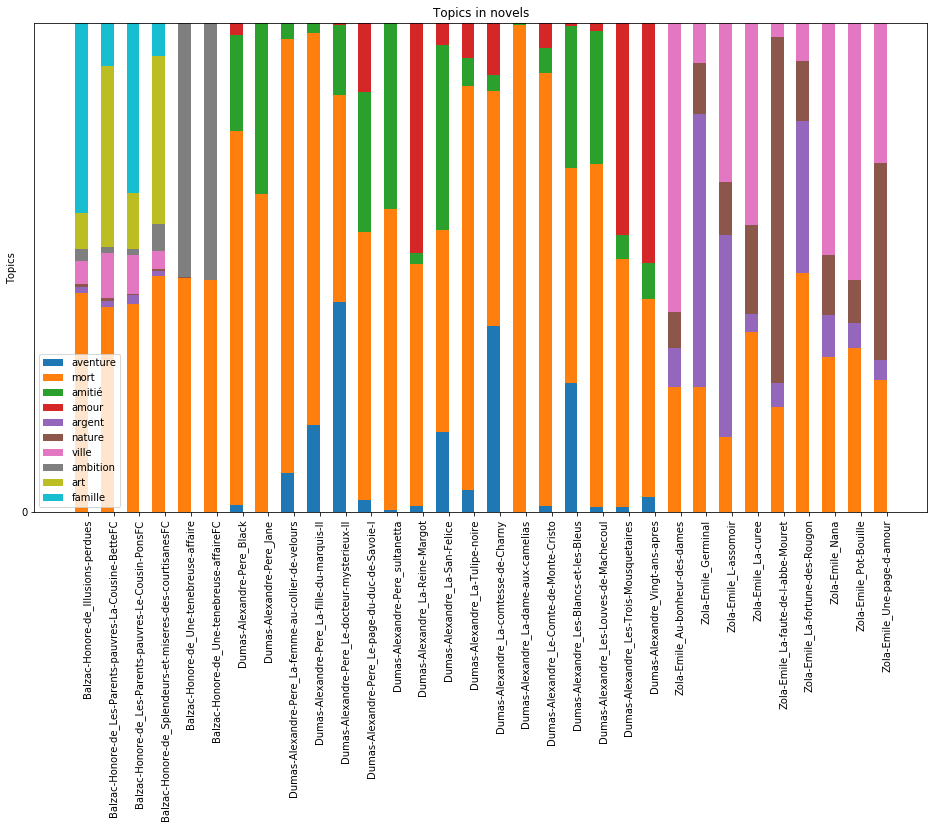

In [43]:
plt.show()